Siandelle Pamplona - DAT402 Project2

# Analyzing Diabetes Risk Factors: Predictive Models

## Introduction

In the face of the escalating diabetes epidemic, affecting 38.4 million people in the United States, accounting for 11.6% of the population, this project will use multiple predictive models to explore the importance and effects of different diabetes risk factors. The dataset provides multiple variables, such as high blood pressure, high cholesterol, BMI, smoking habits, as well as socio-economic factors. 

Statistics from the Centers for Disease Control and Prevention (CDC), reveal that out of the total diabetic population, 29.7 million are diagnosed, leaving 8.7 million undiagnosed (22.8%). Moreover, a staggering 97.6 million individuals age 18 or over struggle with pre-diabetes, highlighting the urgency of understanding and predicting factors that influence diabetes.

This project will explore comprehensive analysis of diabetes risk factors, employing predictive models to unravel the intricate relationships between diverse health indicators and the likelihood of diabetes. 

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [56]:
data.head() #show first 5 rows of the dataset

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Variables
| Variables | Description |
|-----------|-------------|
| Diabetes_012 | 0 indicates no diabetes, 1 = Prediabetes, 2 = Diabetes | 
| HighBP |0 indicates no high blood pressure, 1 = High BP |
| HighChol | 0 = No high cholesterol, 1 = High cholesterol |
| CholCheck | 0 = No cholesterol check in 5 years, 1 = Yes cholesterol check in 5 years |
| BMI | Body Mass Index |
| Smoker | 0 = Not a smoker, 1 = Have ever smoked at least 100 cigarettes (5 packs) |
| Stroke | 0 = Never had a stroke, 1 = Have had a stroke |
| HeartDiseaseorAttack | 0 = No coronary heart disease or myocardial infarction,  1 = Yes CHD or MI |
| PhysActivity | 0 = No to physical activity in past 30 days, 1 = Yes |
| Fruits | 0 = Does not consume fruit 1 or more times per day, 1 = Yes |
| Veggies | 0 = Does not consume vegetables 1 or more times per day, 1 = Yes |
| HvyAlcoholConsumption | Adult men having < 14 drinks/week, adult women having < 7 drinks/week. 0 = No, 1 = Yes |
| AnyHealthCare | Having ay kind of health care coverage. 0 = No, 1 = Yes |
| NoDocbcCost | Past 12 months when cost hindered ability to see doctor. 0 = No, 1 = Yes |
| Genhlth | General health (scale) : 1 = Excellent, 5 = Poor |
| MentalHlth | How many days in the past 30 days was patients mental health poor? # of Days: 1 - 30 |
| PhysHlth | How many days in the past 30 days was patients physical health poor? Including physical injuries. # of Days: 1 - 30 |
| DiffWalk | Difficulty walking or climbing stairs. 0 = No, 1 = Yes |
| Sex | 0 = Female, 1 = male |
| Age | 13-level age category: 1 = age 18-24, 9 = age 60-64, 13 = 80 or older
| Education | Scale 1-6. 1 = Never attended school, 2 = Grade 1-8, 3 = Grade 9 - 11, 4 = Grade 12 or GED, 5 = 1-3 years college (some college), 6 = 4 or more years college (college graduate) |
| Income | Scale 1-8. 1 = $10,000$ or less , 5 = $35,000$ or less, 8 = $75,000$ or more  |

## Linear Regression Model

In [57]:
X = data.drop('Diabetes_012', axis=1) #split data
y = data['BMI'] #target variable

In [58]:
#split train & test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [59]:
model = LinearRegression() #create linear regression model
model.fit(X_train, y_train)
y_pred = model.predict(X_test) #predictions for test set

In [60]:
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

In [61]:
print(f"Mean Square Error: {mse}")
print(f"R-squared: {r2}")

Mean Square Error: 8.931872311061313e-25
R-squared: 1.0


MSE at 8.93e-27 suggests that the models predictions are closer to actual values, refelcting high accuracy. R2 of 1.0 suggests that this linear regression model precisely captures the relationship between Diabetes indicators and BMI. The prositice correlation affirms that as the as BMI level rise, Diabetes indicator also increases

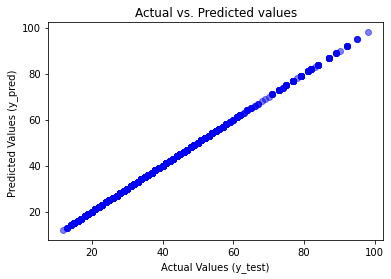

In [62]:
plt.scatter(y_test, y_pred, color='blue', alpha = 0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred) ")
plt.title("Actual vs. Predicted values")
plt.show()

In this model, a scatterplot was created to visualize the relationship between the Diabetes and BMI (Body Mass Index). The diagonal line indicated a positive correlation between the two variables. As the Diabetes indicator increases from 0 to 2 (0 meaning no diabetes, or only present during pregnancy, 1 meaning prediabetes, and 2 meaning diabetes) BMI levels tend to also be increased. This suggests that individuals with diabetes are more likely to have a higher BMI.

## K-Nearest Neighbor Model

In this section, we will implement the K-Nearest Neighbors (KNN) method for a binary classification task. It loads the dataset containing health-related and non-health related attributes such as High blood pressure, Smoker/non-smoker, BMI, Age, Education, Income, as well as some other features. The KNN classifier is trained on the data, then makes predictions for testing the data. The accuracy calculation measures how well the model predicts the presence or absence of diabetes given the attributes. 

In [63]:
X = data.drop("Diabetes_012", axis=1)
y = data["Diabetes_012"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred) #calculate accuracy of KNN model
print(f"Accuracy: {accuracy}") 

Accuracy: 0.831322926521602


The accuracy value of 0.8313, or 83.13% indicates the proportion of correctly classified instances. This means that the KNN model correctly predicted the class labels for approximately 83.13% of the data points. This suggests thar the KNN model is reasonably effective but it may not provide a complete picture.

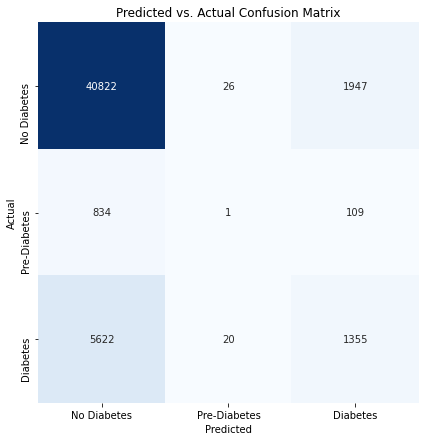

In [67]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (9,7))
sns.heatmap(confusion, annot=True, fmt = 'g', cmap = 'Blues', cbar = False, square = True, xticklabels = ["No Diabetes","Pre-Diabetes", "Diabetes"], yticklabels = ["No Diabetes", "Pre-Diabetes", "Diabetes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs. Actual Confusion Matrix')
plt.show()

To visualize our KNN model, I have provided a confusion matrix with three classes: "No diabetes", "Pre-Diabetes", and "Diabetes". The count from each class determines the true negatives, true positives, false positives and false negatives:

| Class | Column 1 | Column 2 | Column 3 |
|-------|----------|----------|----------|
|No Diabetes | 40822 true negatives | 26 false positives | 1947 false negatives |
|Pre-diabetes | 834 false negatives | 1 true positive | 109 false positives |
|Diabetes | 5622 false negatives | 20 false positives | 1355 true positives |

This matrix helps us to evaluate the models capacity to accurately categorize instances into their correct classes and it also highlights any classification errors made by the model. 

## Random Forest and Cross-Validation

In [14]:
#Random Forest Model
model = RandomForestClassifier()

In [15]:
y_pred = cross_val_score(model, X, y, cv = 5)
model.fit(X,y)

feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

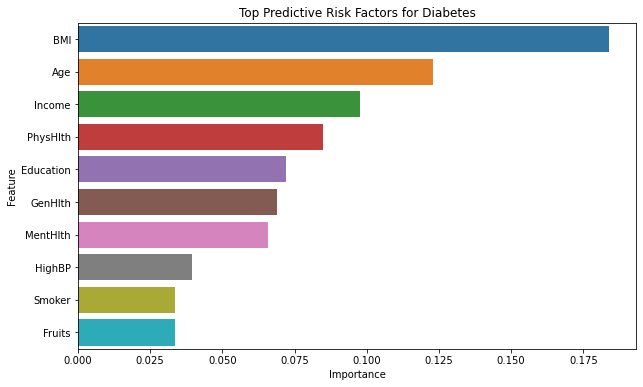

In [16]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Importance', y='Feature', data = importance_df.head(10))
plt.title('Top Predictive Risk Factors for Diabetes')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Using a random forest model evaluated using cross-validation to generate the bar plot above, the visualization shows the top predictive risk factors for diabetes using feature importance scores. Each bar represents a different attribute related to diabetes risk. The length of the bar corresponds to each factor and their importance in predicting diabetes. This visualization summarizes the strongest contributing risk factors to predict diabetes.

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

data['Diabetes_binary'] = data['Diabetes_012'].apply(lambda x:1 if x in [1,2] else 0)
independent_vars = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
                    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                    'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
                    'Education', 'Income']

X = data[independent_vars]
y = data['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

accuracy = model.score(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)

Intercept: [-2.21256385]
Coefficients: [[ 0.34812803  0.28501443  0.22846837  0.41046438 -0.0047927   0.02225779
   0.06145904 -0.0177331  -0.01951312 -0.01706584 -0.1486021   0.00792483
   0.02263556  0.54381056 -0.01304018 -0.0633026   0.04989296  0.12128802
   0.38650454 -0.03956768 -0.11470607]]
Test Accuracy: 0.8493574582150741


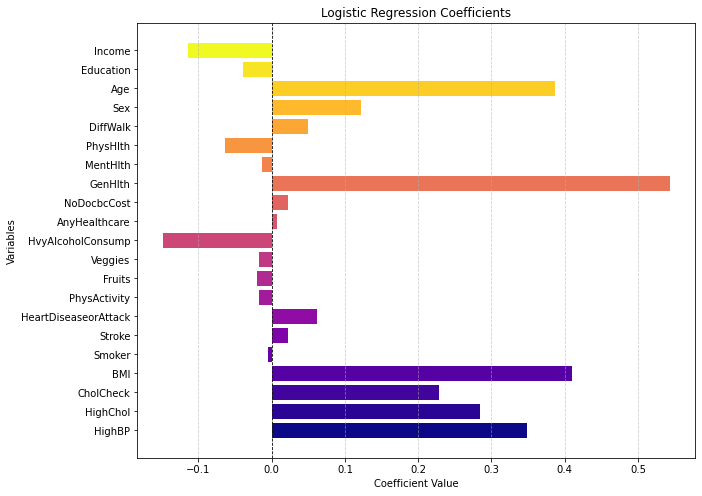

In [18]:
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.get_cmap('plasma')

plt.figure(figsize = (10,8))
plt.barh(independent_vars, model.coef_[0], color=cmap(np.linspace(0,1,len(independent_vars))))
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Variables')
plt.grid(axis = 'x', linestyle='--', alpha=0.6)
plt.show()

This bar graph represets the Logistic Regression results presented above. The sign of the coefficient (negative or positive) indicates the direction of the relationship between the variable and the likelihood of having diabetes. For example, a positive coefficient, as seen in variables like High Blood Pressure and BMI, suggests that an increase in these factors is associated with higher odds of diabetes. Alternatively, variables with negative coefficients such as Phyical Activity, imply that those who have engaged in physical activity within the past thirty days is linked to lower odds of having diabetes compared to those who have not been physically active. 

## Ridge Regression to Predict BMI

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

X = data.drop('Diabetes_012', axis =1)
y = data['BMI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ridge_model = Ridge()

alphas = [0.001, 0.01, 0.1, 1, 10, 100]

grid_search = GridSearchCV(ridge_model, {'alpha': alphas}, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Mean Square Error: {mse_ridge}")
print(f"Ridge R-squared: {r2_ridge}")
      

Ridge Mean Square Error: 6.298156372422518e-19
Ridge R-squared: 1.0


These results suggest that the Ridge Regression model performs exceptinally well on the test data. The model makes highly accurate preditions of BMI, and the model effectively captures the relationship between the health indicators and BMI. Compared to the linear regression figure at the start of the project, which shows the positive correlation between BMI and Diabetes, this ridge regression model shows a strong indication for predicting BMI values given the other values in the dataset.

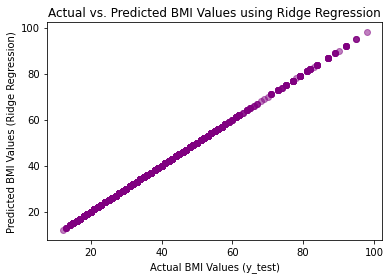

In [16]:
plt.scatter(y_test, y_pred_ridge, color="purple", alpha=0.5)
plt.xlabel("Actual BMI Values (y_test)")
plt.ylabel("Predicted BMI Values (Ridge Regression)")
plt.title("Actual vs. Predicted BMI Values using Ridge Regression")
plt.show()

This Ridge Regression Analysis figure shows the actual versus predicted values of BMI based on various other health indicators from the dataset. The Ridge Mean Square Error value of 6.30e-19 indicates that the model's predicitons align nearly exactly with the actual BMI values in the test set. The ridge regression model captures the relationship beween health indicators and BMI, showcasing its efficacy in predicting BMI values with a high degree of precision and accounting for variability in data points. 

## Decision Tree Model

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [28]:
data['Diabetes'] = data['Diabetes_012'].apply(lambda x: 1 if x == 2 else 0)

X = data[['Age']]
y = data['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train[['Age']], y_train) #Age as predictor

y_probs_tree = tree_classifier.predict_proba(X_test[['Age']])[:,1]

fpr,tpr,thresholds = roc_curve(y_test, y_probs_tree)
roc_auc = auc(fpr,tpr)

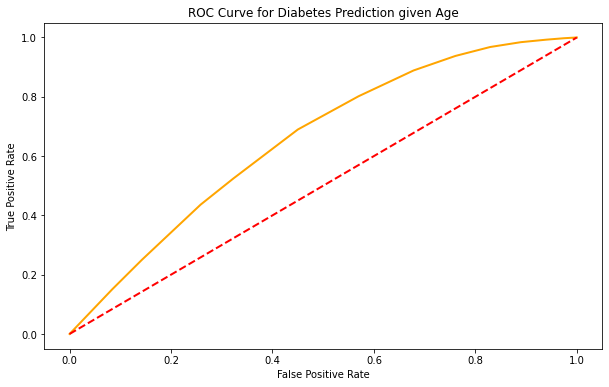

In [33]:
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction given Age')
plt.show()

The provided figure depicts a Receiver Operating Characteristic (ROC) curve, showcasing the Decision Tree Classifier's performance in predicting diabetes based on age. The diagonal dotted line serves as a reference for random results. The orange curve illustrates the model's efficacy in distinguishing between individuals with and without diabetes based on age. A higher Area Under the Curve (AUC) correlates with a more successful predictive model. Notably, the curve in this figure displays an upward bend, signifying that the model outperforms random chance (as represented by the dotted line).

<Figure size 720x432 with 0 Axes>

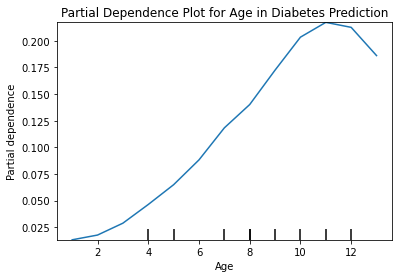

In [46]:
from sklearn.inspection import plot_partial_dependence

plt.figure(figsize=(10,6))
plot_partial_dependence(tree_classifier, X_train, features=['Age'], grid_resolution=50)
plt.title('Partial Dependence Plot for Age in Diabetes Prediction')
plt.show()

This partial dependence plot for diabetes prediction given 'Age' illustrates the relationship between age and the predicted probability of having diabetes. Specifically, as the age variable changes, the line on the plot indicated how the model's prediction changes, offering insights into the impact of age on the likelihoog of diabetes according to the trained decsion tree model. The peak from 'Age'range 8-11 shows a more pronounced prediction of diabetes from the age ranges within those scale values. It is important to remember the 'Age' variable in this dataset is a 13-level age category: 1 = age 18-24, 9 = age 60-64, 13 = 80 or older. 

## Conclusion

This comprehensive analysis of diabetes risk factors and prodictive modeling provides valuable insights into the relationships between various health indicators and the likelihood of diabetes. As we confront the significant public health challenge posed by diabetes, the importance of robust predictive models not only aid in understanding risk factors but also serve as crutial tools for early detection and intervention, potentially mitigating the impact of these health concerns. 

## References

Teboul, Alex. “Diabetes Health Indicators Dataset.” Kaggle, 8 Nov. 2021, www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data. 

“National Diabetes Statistics Report.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 14 Nov. 2023, www.cdc.gov/diabetes/data/statistics-report/index.html. 